In [1]:
import uproot
file = uproot.open("ZH_HCC_ZLL_NanoV9_2017_867C.root")
file.classnames()

{'tag;1': 'TObjString',
 'Events;1': 'TTree',
 'LuminosityBlocks;1': 'TTree',
 'Runs;1': 'TTree',
 'MetaData;1': 'TTree',
 'ParameterSets;1': 'TTree'}

In [2]:
tree = file["Events"]
tree.keys()

['run',
 'luminosityBlock',
 'event',
 'HTXS_Higgs_pt',
 'HTXS_Higgs_y',
 'HTXS_stage1_1_cat_pTjet25GeV',
 'HTXS_stage1_1_cat_pTjet30GeV',
 'HTXS_stage1_1_fine_cat_pTjet25GeV',
 'HTXS_stage1_1_fine_cat_pTjet30GeV',
 'HTXS_stage1_2_cat_pTjet25GeV',
 'HTXS_stage1_2_cat_pTjet30GeV',
 'HTXS_stage1_2_fine_cat_pTjet25GeV',
 'HTXS_stage1_2_fine_cat_pTjet30GeV',
 'HTXS_stage_0',
 'HTXS_stage_1_pTjet25',
 'HTXS_stage_1_pTjet30',
 'HTXS_njets25',
 'HTXS_njets30',
 'nboostedTau',
 'boostedTau_chargedIso',
 'boostedTau_eta',
 'boostedTau_leadTkDeltaEta',
 'boostedTau_leadTkDeltaPhi',
 'boostedTau_leadTkPtOverTauPt',
 'boostedTau_mass',
 'boostedTau_neutralIso',
 'boostedTau_phi',
 'boostedTau_photonsOutsideSignalCone',
 'boostedTau_pt',
 'boostedTau_puCorr',
 'boostedTau_rawAntiEle2018',
 'boostedTau_rawIso',
 'boostedTau_rawIsodR03',
 'boostedTau_rawMVAnewDM2017v2',
 'boostedTau_rawMVAoldDM2017v2',
 'boostedTau_rawMVAoldDMdR032017v2',
 'boostedTau_charge',
 'boostedTau_decayMode',
 'boostedTau_je

In [3]:
branches = tree.arrays()
# print(len(branches))

In [4]:
double_muon_mask = branches["nMuon"] > 1
print(double_muon_mask)
print(branches["nMuon"][double_muon_mask])

import numpy as np
np.sum(branches["nMuon"][double_muon_mask])

[False, False, False, False, False, ..., False, False, False, True, False]
[3, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 6, 2, ..., 2, 3, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2]


9894

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from pylorentz import Momentum4

Muon1_mass = np.array([sublist[0] for sublist in branches["Muon_mass"][double_muon_mask]])
Muon1_eta = np.array([sublist[0] for sublist in branches["Muon_eta"][double_muon_mask]])
Muon1_phi = np.array([sublist[0] for sublist in branches["Muon_phi"][double_muon_mask]])
Muon1_pt = np.array([sublist[0] for sublist in branches["Muon_pt"][double_muon_mask]])

Muon2_mass = np.array([sublist[1] for sublist in branches["Muon_mass"][double_muon_mask]])
Muon2_eta = np.array([sublist[1] for sublist in branches["Muon_eta"][double_muon_mask]])
Muon2_phi = np.array([sublist[1] for sublist in branches["Muon_phi"][double_muon_mask]])
Muon2_pt = np.array([sublist[1] for sublist in branches["Muon_pt"][double_muon_mask]])

Muon1 = Momentum4.m_eta_phi_pt(Muon1_mass, Muon1_eta, Muon1_phi, Muon1_pt)
Muon2 = Momentum4.m_eta_phi_pt(Muon2_mass, Muon2_eta, Muon2_phi, Muon2_pt)

M = Muon1 + Muon2
print(M.m)
len(M.m)

[2.40483484e+03 9.42009236e+01 2.69731118e+01 ... 1.33173424e+01
 9.02842122e+01 1.17359200e+00]


4171

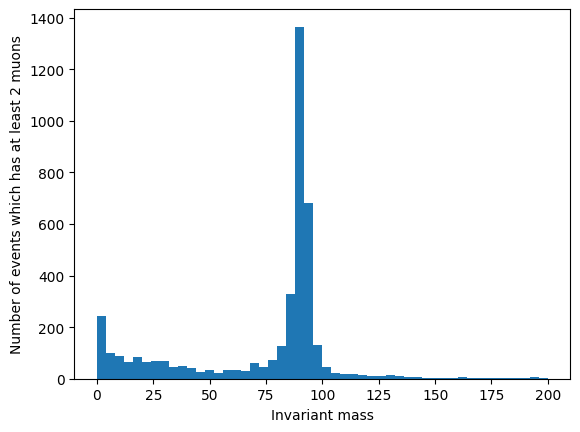

In [6]:
plt.hist(M.m, bins = 50, range = (0, 200))
plt.xlabel("Invariant mass")
plt.ylabel("Number of events which has at least 2 muons")
plt.show()

Text(0, 0.5, 'Number of events which has at least 2 muons')

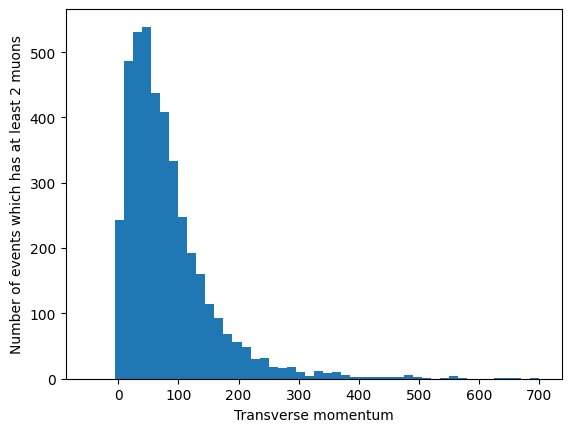

In [7]:
plt.hist(M.p_t, bins = 50, range = (-50, 700))
plt.xlabel("Transverse momentum")
plt.ylabel("Number of events which has at least 2 muons")

<>:26: SyntaxWarning: invalid escape sequence '\m'
<>:26: SyntaxWarning: invalid escape sequence '\m'
C:\Users\황시연\AppData\Local\Temp\ipykernel_27744\202179083.py:26: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel("Jet $p_{\mathrm{T}}$ [Gev]")


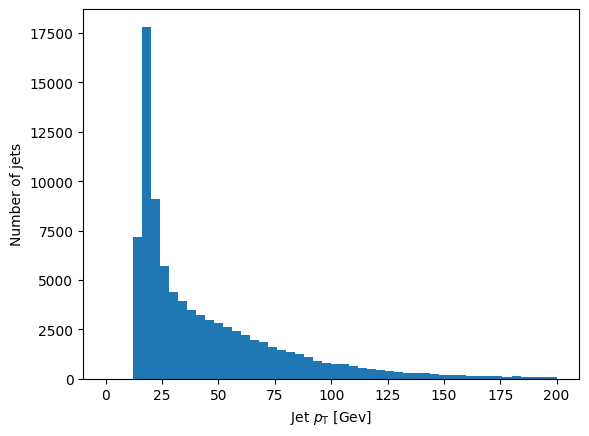

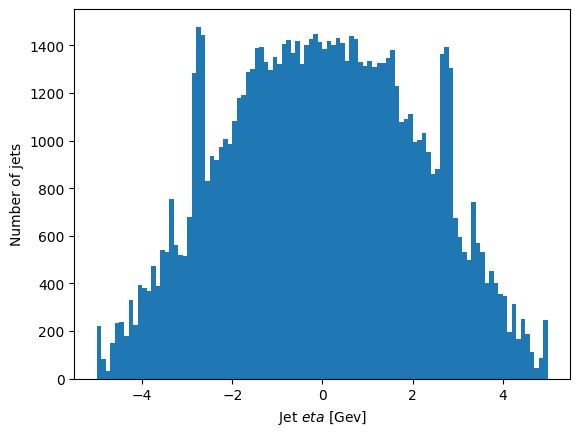

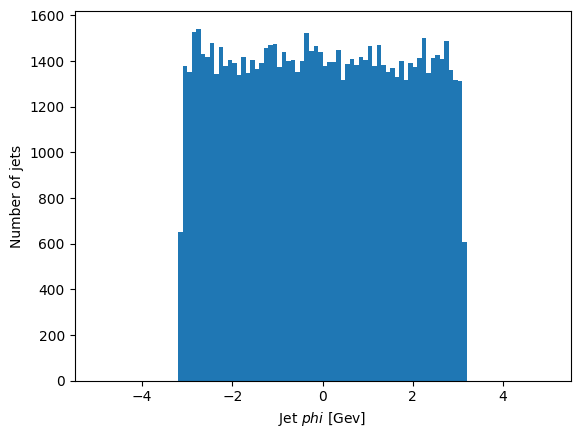

In [8]:
pt = []
eta = []
phi = []

for i in range(0, len(branches)):
    # if i < 10:
    #     print(i)
    #     print("nMuon = ", branches["nMuon"][i], len(branches["Muon_pt"][i]))
    #     print(branches["Jet_pt"][i])

    # for j in range(0, branches["nMuon"][i]):
    #     if i < 10:
    #         print(branches["Muon_pt"][i][j])

    for j in range(0, len(branches["Jet_pt"][i])):
        # if i < 10:
        pt.append(branches["Jet_pt"][i][j])

    for k in range(0, len(branches["Jet_eta"][i])):
        eta.append(branches["Jet_eta"][i][k])

    for l in range(0, len(branches["Jet_phi"][i])):
        phi.append(branches["Jet_phi"][i][l])

plt.hist(pt, bins = 50, range = (0, 200))
plt.xlabel("Jet $p_{\mathrm{T}}$ [Gev]")
plt.ylabel("Number of jets")
plt.show()

plt.hist(eta, bins = 100, range = (-5, 5))
plt.xlabel("Jet $eta$ [Gev]")
plt.ylabel("Number of jets")
plt.show()

plt.hist(phi, bins = 100, range = (-5, 5))
plt.xlabel("Jet $phi$ [Gev]")
plt.ylabel("Number of jets")
plt.show()

In [14]:
double_jet_mask = branches["nJet"] > 1
print(double_jet_mask)
print(branches["nJet"][double_jet_mask])

momentum = ["Jet_mass", "Jet_eta", "Jet_phi", "Jet_pt"]

for i in momentum:
    for j in range(0, 2):
        print(f"{i}{j + 1} = ", [sublist[j] for sublist in branches[i][double_jet_mask]])

[True, True, True, True, True, True, ..., True, True, True, True, True, True]
[7, 6, 4, 6, 4, 6, 3, 5, 11, 7, 3, 4, ..., 6, 2, 11, 4, 7, 5, 6, 7, 10, 12, 9]
Jet_mass1 =  [16.796875, 11.671875, 9.8671875, 7.453125, 14.25, 10.1640625, 12.03125, 6.8554688, 15.015625, 6.6875, 7.4960938, 10.4453125, 13.90625, 10.984375, 16.859375, 9.1875, 9.8359375, 10.953125, 14.1953125, 13.0859375, 6.3398438, 9.2890625, 3.7636719, 20.140625, 14.1640625, 10.2265625, 13.859375, 14.0390625, 4.7460938, 14.5, 7.453125, 8.9140625, 32.8125, 10.5, 15.921875, 2.9902344, 29.5625, 5.7929688, 7.2226562, 5.1171875, 11.453125, 18.640625, 20.1875, 13.65625, 13.6640625, 7.8359375, 8.1328125, 15.0078125, 8.7265625, 12.03125, 12.3359375, 9.703125, 9.4765625, 18.359375, 8.8828125, 11.609375, 13.9765625, 8.78125, 15.3359375, 12.875, 12.9921875, 10.8359375, 10.5234375, 9.3984375, 7.9140625, 14.9765625, 8.0390625, 10.2265625, 3.4765625, 7.46875, 9.7265625, 18.828125, 3.296875, 3.7753906, 5.9257812, 10.8203125, 9.59375, 11.5234

In [10]:
momentum = ["Jet_mass", "Jet_eta", "Jet_phi", "Jet_pt"]

Jet1_mass = np.array([sublist[0] for sublist in branches["Jet_mass"][double_jet_mask]])
Jet1_eta = np.array([sublist[0] for sublist in branches["Jet_eta"][double_jet_mask]])
Jet1_phi = np.array([sublist[0] for sublist in branches["Jet_phi"][double_jet_mask]])
Jet1_pt = np.array([sublist[0] for sublist in branches["Jet_pt"][double_jet_mask]])

Jet2_mass = np.array([sublist[1] for sublist in branches["Jet_mass"][double_jet_mask]])
Jet2_eta = np.array([sublist[1] for sublist in branches["Jet_eta"][double_jet_mask]])
Jet2_phi = np.array([sublist[1] for sublist in branches["Jet_phi"][double_jet_mask]])
Jet2_pt = np.array([sublist[1] for sublist in branches["Jet_pt"][double_jet_mask]])

Jet1 = Momentum4.m_eta_phi_pt(Jet1_mass, Jet1_eta, Jet1_phi, Jet1_pt)
Jet2 = Momentum4.m_eta_phi_pt(Jet2_mass, Jet2_eta, Jet2_phi, Jet2_pt)

M = Jet1 + Jet2
print(M.m)
len(M.m)

[264.66214444 130.57243749 209.80812404 ...  99.44189458 226.24783767
 131.87222568]


13290

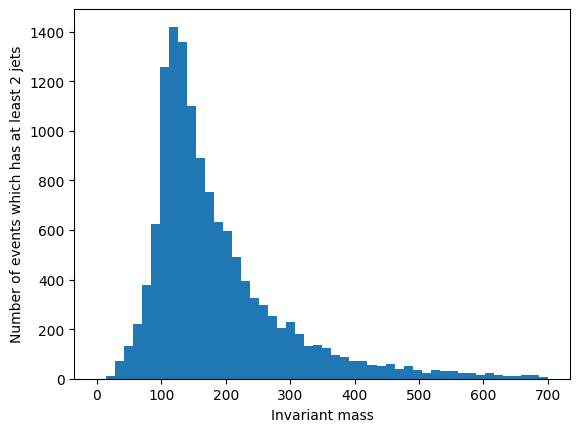

In [11]:
plt.hist(M.m, bins = 50, range = (0, 700))
plt.xlabel("Invariant mass")
plt.ylabel("Number of events which has at least 2 jets")
plt.show()

Text(0, 0.5, 'Number of events which has at least 2 jets')

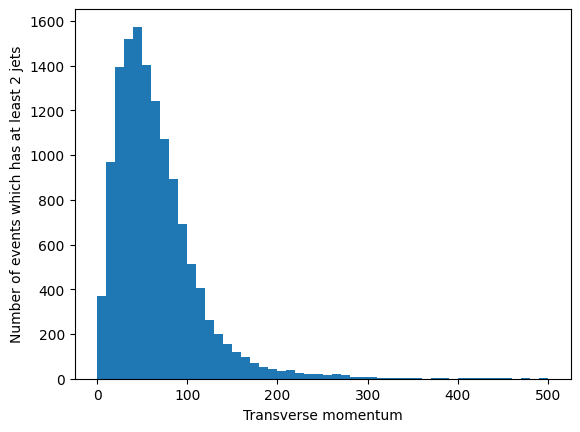

In [12]:
plt.hist(M.p_t, bins = 50, range = (0, 500))
plt.xlabel("Transverse momentum")
plt.ylabel("Number of events which has at least 2 jets")